<Axes: >

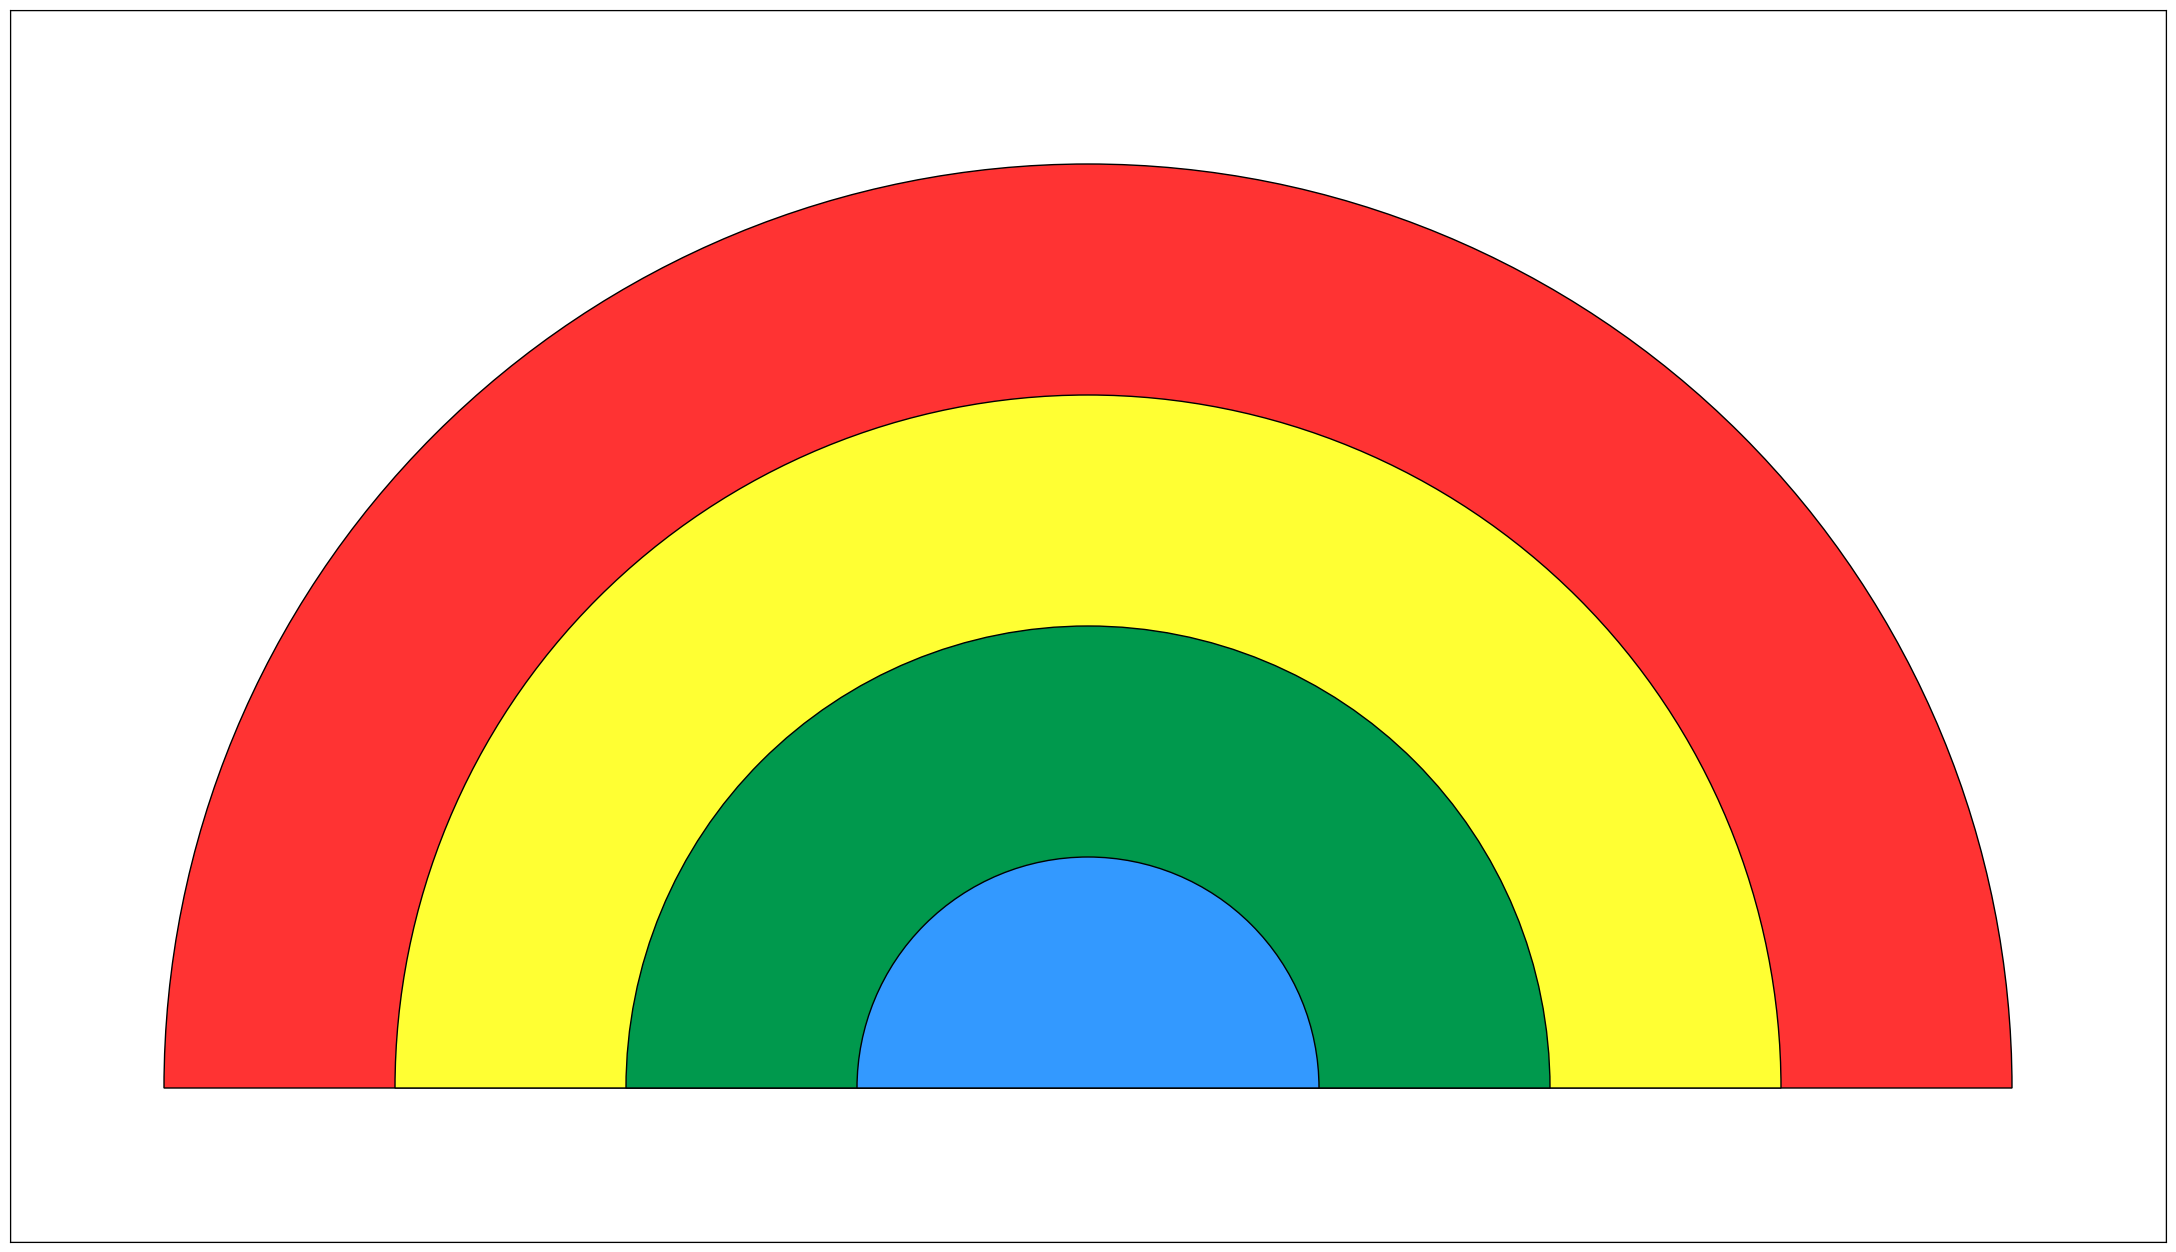

In [107]:
#Q1, part A
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.patches import Rectangle
import numpy as np

def draw_rainbow():
    # Define the canvas dimensions and rainbow dimensions
    canvas_width = 28
    canvas_height = 16
    rainbow_height = 12

    # Define the colors of the rainbow
    colors = ['#FF3333', '#FFFF33', '#00994D', '#3399FF']

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(canvas_width, canvas_height))

    # Draw the rainbow arcs
    for i, color in enumerate(colors):
        # Wedge parameters: center, radius, theta1, theta2
        wedge = Wedge((0, 0), rainbow_height - i * 3, 0, 180, edgecolor = '#000000', facecolor=color, linewidth = 1)
        ax.add_patch(wedge)

    # Draw the canvas border
    border = Rectangle((-canvas_width / 2, -2), canvas_width, canvas_height, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(border)
    
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-canvas_width / 2, canvas_width/ 2)
    ax.set_ylim(-2, canvas_height-2)

    # Display the image
    # plt.show()
    #preparation for part C
    return ax

# Call the function to draw the canvas
draw_rainbow()

In [71]:
#Q1, part B
#Define (0,0) as the center of the semicircles
def toss_result(x, y):
    # Define the radius of the coin
    coin_radius = 1

    # Define the boundaries for each color
    # The semicircles are centered at (0, 0) and extend vertically up to the radius
    red_boundary = 12  # Red arc radius
    yellow_boundary = 9  # Yellow arc radius
    green_boundary = 6  # Green arc radius
    blue_boundary = 3  # Blue arc radius

    distance = x**2 + y**2

    # Fail Cases: too low
    if y <= 1:
        return "Failed"
        
    # Check if the coin is within the red area
    if ( distance < (red_boundary - coin_radius)**2) and (distance > (yellow_boundary + coin_radius)**2):
        return "Red"

    # Check if the coin is within the yellow area
    if ( distance < (yellow_boundary - coin_radius)**2) and (distance > (green_boundary + coin_radius)**2):
        return "Yellow"

    # Check if the coin is within the green area
    if ( distance <= (green_boundary - coin_radius)**2) and (distance >= (blue_boundary + coin_radius)**2):
        return "Green"

    # Check if the coin is within the blue area
    if distance < (blue_boundary - coin_radius)**2:
        return "Blue"

    # If it falls completely on the white area or touches a black line
    return "Failed"



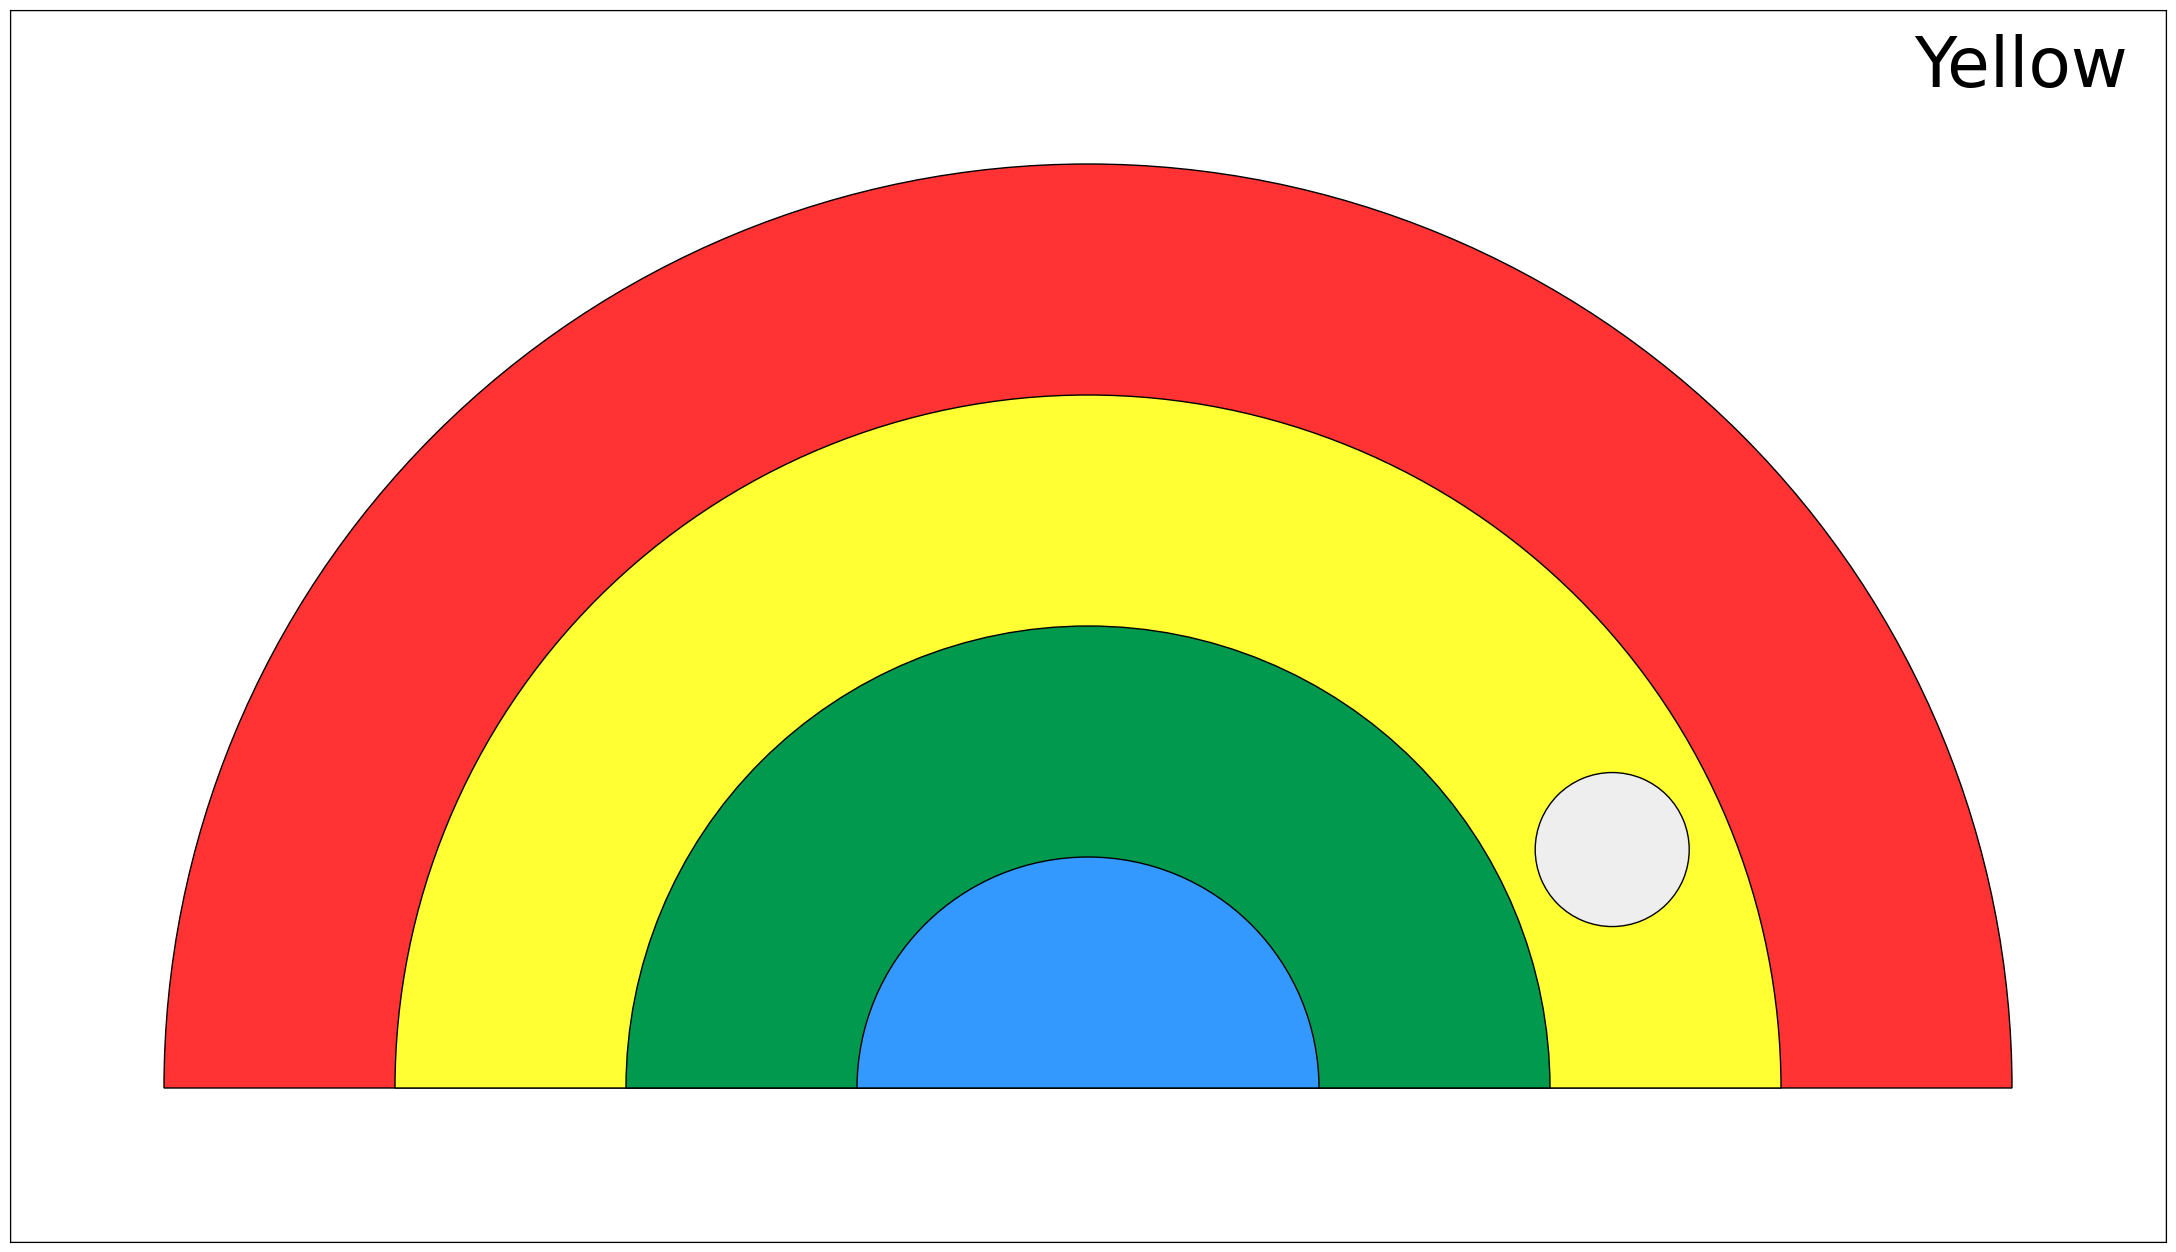

In [128]:
#Q1, part C
def toss_rainbow():
    # Simulates one (uniformly) random toss which always falls completely in the canvas
    left_bound = -13
    right_bound = 13
    lower_bound = -1
    upper_bound = 13
    x = (right_bound - left_bound)*np.random.rand() + left_bound
    y = (upper_bound - lower_bound)*np.random.rand() + lower_bound
    
    # Draw the rainbow
    ax = draw_rainbow()

    # Draw the coin
    coin = Wedge((x, y), 1, 0, 360, edgecolor = '#000000', facecolor='#EEEEEE', linewidth = 1)
    ax.add_patch(coin)

    # Output the text
    text = toss_result(x,y)
    ax.text(13.5, 13, text, fontsize = 50, horizontalalignment = 'right')
    
    plt.show()

toss_rainbow()

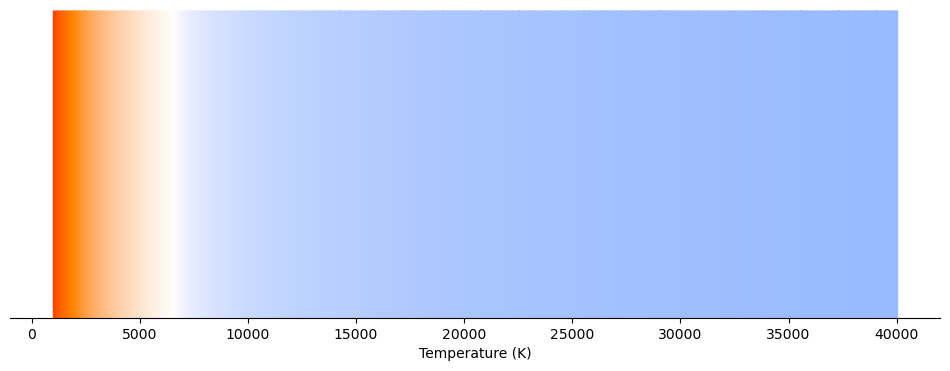

In [162]:
#Q2
import numpy as np
import matplotlib.pyplot as plt

def temp2rgb(T):
    """
    Convert temperature in Kelvin to RGB values.
    
    Args:
    T (float): Temperature in Kelvin.
    
    Returns:
    tuple: RGB values as a tuple of floats in the range [0, 1].
    """
    T = T/100
    
    # Interpolate the RGB values for the given temperature
    if T <= 66:
        r_val = 255
        g_val = 99.4708025861 * np.log(T) - 161.1195681661
        if T <= 19:
            b_val = 0
        else:
            b_val = 138.5177312231 * np.log(T-10) - 305.0447927307
    else:
        r_val = 329.698727446 *(T - 60) ** (-0.1332047592)
        g_val = 288.1221695283 *(T - 60) ** (-0.0755148492)
        b_val = 255
        
    # Clamp values between 0 and 255
    r_val = max(0, min(255, r_val))
    g_val = max(0, min(255, g_val))
    b_val = max(0, min(255, b_val))
    
    return (r_val, g_val, b_val)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlim(-1000, 42000)
ax.set_xticks(np.arange(0, 42001, 5000))
ax.set_xlabel('Temperature (K)')

# Hide the y-axis
ax.yaxis.set_visible(False)

# Hide the top and right spines (borders), keep bottom (x-axis) visible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


# Plot the temperature range
x = np.linspace(1000, 40000, 1000)
for T in x:
    r, g, b = temp2rgb(T)
    ax.axvspan(T, T+1, facecolor=(r/255, g/255, b/255), edgecolor=(r/255, g/255, b/255))

ax.grid(False)
plt.show()

In [ ]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

# Load and resize the DVD logo image
logo = Image.open("dvd_logo.png")
logo = logo.resize((100, 75))  # Resize to fit 4:3 aspect ratio
logo = np.array(logo)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 800)  # Width of the screen
ax.set_ylim(0, 600)  # Height of the screen
ax.set_facecolor('black')
ax.axis('off')  # Hide axes ticks

# Initial position and velocity
x, y = np.random.rand(2) * [800 - 100, 600 - 75]  # Random starting position
dx, dy = 5, 5  # Velocity in x and y direction

# Function to update the animation
def update(frame):
    global x, y, dx, dy

    # Update position
    x += dx
    y += dy

    # Bounce off the walls
    if x <= 0 or x >= 800 - 100:
        dx *= -1  # Reverse direction
    if y <= 0 or y >= 600 - 75:
        dy *= -1  # Reverse direction

    # Clear the axis and redraw the logo
    ax.clear()
    ax.imshow(logo, extent=[x, x + 100, y, y + 75])  # Draw the logo
    ax.set_xlim(0, 800)
    ax.set_ylim(0, 600)
    ax.set_facecolor('black')
    ax.axis('off')  # Hide axes ticks

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=300, interval=20, repeat=False)

# Show the animation
plt.show()